## 2.5 Unsupervised Learning - Clustering

### K-Means Clustering

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
import numpy as np

# Load PCA dataset
pca_df = pd.read_csv("heart_pca.csv")

# Separate features & target
X = pca_df.drop(columns=["target"])
y = pca_df["target"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train KMeans
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(X_train)

# Predict clusters
y_pred_clusters = kmeans.predict(X_test)

# Map cluster labels to match true labels
# Find best mapping by checking majority vote in each cluster
mapping = {}
for cluster in np.unique(y_pred_clusters):
    true_label = y_test[y_pred_clusters == cluster].mode()[0]
    mapping[cluster] = true_label

# Apply mapping
y_pred_mapped = [mapping[c] for c in y_pred_clusters]

# Classification report
print(classification_report(y_test, y_pred_mapped))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        32
           1       0.96      0.89      0.93        28

    accuracy                           0.93        60
   macro avg       0.94      0.93      0.93        60
weighted avg       0.93      0.93      0.93        60



In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import classification_report
import numpy as np

# Load PCA dataset
pca_df = pd.read_csv("heart_pca.csv")

# Separate features & target
X = pca_df.drop(columns=["target"])
y = pca_df["target"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Hierarchical Clustering (Agglomerative)
hc = AgglomerativeClustering(n_clusters=2, linkage="ward")
y_pred_clusters = hc.fit_predict(X_test)   # directly on test set

# Map cluster labels to match true labels
mapping = {}
for cluster in np.unique(y_pred_clusters):
    true_label = y_test[y_pred_clusters == cluster].mode()[0]
    mapping[cluster] = true_label

# Apply mapping
y_pred_mapped = [mapping[c] for c in y_pred_clusters]

# Classification report
print(classification_report(y_test, y_pred_mapped))


              precision    recall  f1-score   support

           0       0.88      0.91      0.89        32
           1       0.89      0.86      0.87        28

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



<function matplotlib.pyplot.show(close=None, block=None)>

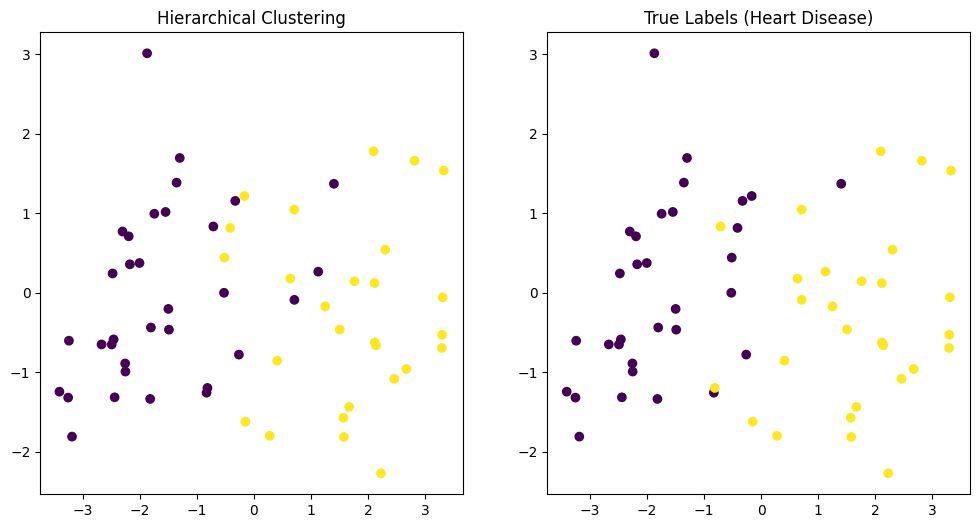

In [6]:
import matplotlib.pyplot as plt

X_test_2d = X_test.iloc[:, :10]

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Hierarchical clusters
ax1.set_title("Hierarchical Clustering")
ax1.scatter(
    X_test_2d.iloc[:, 0], X_test_2d.iloc[:, 1],
    c=y_pred_clusters, cmap="viridis"
)

# True disease labels
ax2.set_title("True Labels (Heart Disease)")
ax2.scatter(
    X_test_2d.iloc[:, 0], X_test_2d.iloc[:, 1],
    c=y_test, cmap="viridis"
)

plt.show